<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/2_3_8_%EC%BB%A4%EB%84%90_%EC%84%9C%ED%8F%AC%EB%93%9C_%EB%B2%A1%ED%84%B0_%EB%A8%B8%EC%8B%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 커널 서포드 벡터 머신

분류용 선형 모델은 크게 두자지로 나뉘다.

1.  선형 서포드 벡터 머신
2.  커널 서포트 벡터 머신 / SVM
  


\
특징:
-  초평면으로 정의 되지 않는 더 복잡한 모델을 만들 수 있도록 확장한것이다. 
-  분류 문제만 다룰 것이다. 커널 서포트 벡터 머신의 수학적 정의는 조금 복잡에서 다 담기엔 무리가 있다. 
- 직선과 초평면은 유연하지 못하여 저차원 데이터세에서는 선형 모델이 매우 제한적이다. 선형 모델을 유연하게 만드는 방법은 특성끼리 곱하거나 특성을 거듭제곱하는 식으로 새로운 특성을 추가하는 것이다.


In [2]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=797a42ab84f64bc9ceafe5ced9d377512b5dfce2c9cb1dcbf1755958ea910ec1
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import matplotlib

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=3)
sns.set(rc = {'figure.figsize':(15,8)})

from pandas.core.common import random_state

선형적으로 구분되지 않는 클래스를 가진 이진 분류 데이터셋

Text(0, 0.5, 'feature 2')

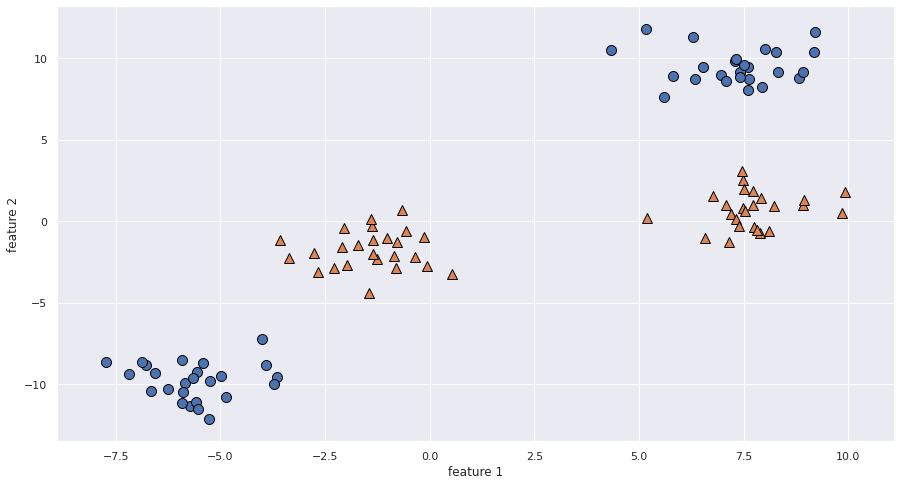

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

#plt.figure(figsize=(20,10))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 1")
plt.ylabel("feature 2")

Text(0, 0.5, '특성 1')

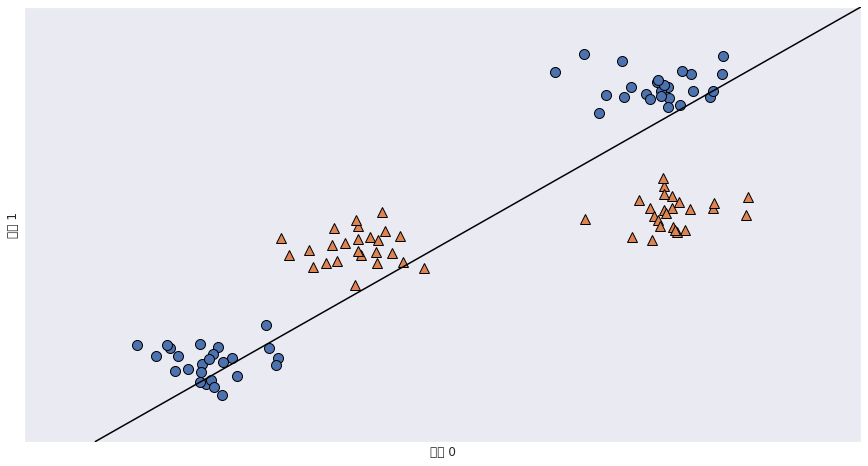

In [5]:
# 
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=5000, tol=1e-3).fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

선형 모델은 직선으로 데이터 포인트를 나누는데, 위와 같은 경우엔 적절해 보이지 않는다.

이제 특성을 곱한 특성 1**2를 새로운 특성으로 추가해 입력 특성을 확장해보겠다.
즉 (특성0, 특성1) >> (특성0, 특성1, 특성1**2)라는 3차원 데이터 포인트로 표현된다.

Text(0.5, 0, 'feature 1 ** 2')

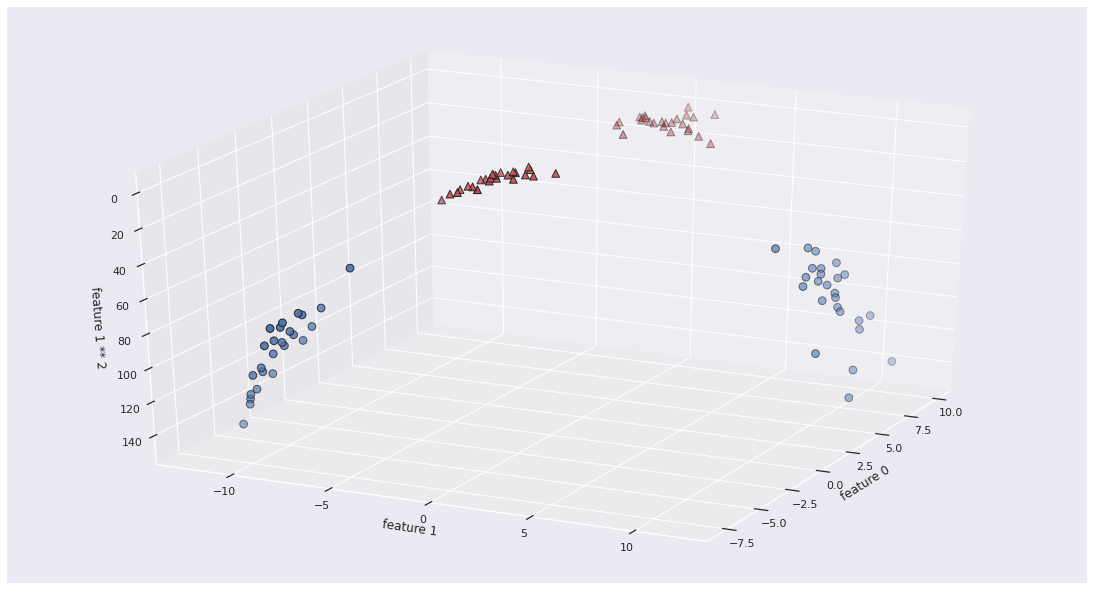

In [6]:
# 두번째 특성을 제곱하여 추가한다.
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

# 3차원 그래프
if matplotlib.__version__>= '3.4':
  # Axes3D가 자동으로 그림에 추가되는 방식은 matplotlib 3.4 버전에서 deprecate 되었다.
  # 이와 관련된 경고를 피하려면 auto_add_to_figure=False로 지정하고 
  # figure.add_axes(ax)로 직접 추가해야 한다.
  ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
  figure.add_axes(ax)
else:
  ax = Axes3D(figure, elev=-152, azim=-26)

# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그린다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 1 ** 2")



새로운 데이터셋에서는 선형 모델과 3차원 공간의 평면을 사용해 두 클래스를 구분할 수 있따. 확장된 데이터셋에서 선형 모델을 만들어 확인해보자.


Text(0.5, 0, 'feature 1 ** 2')

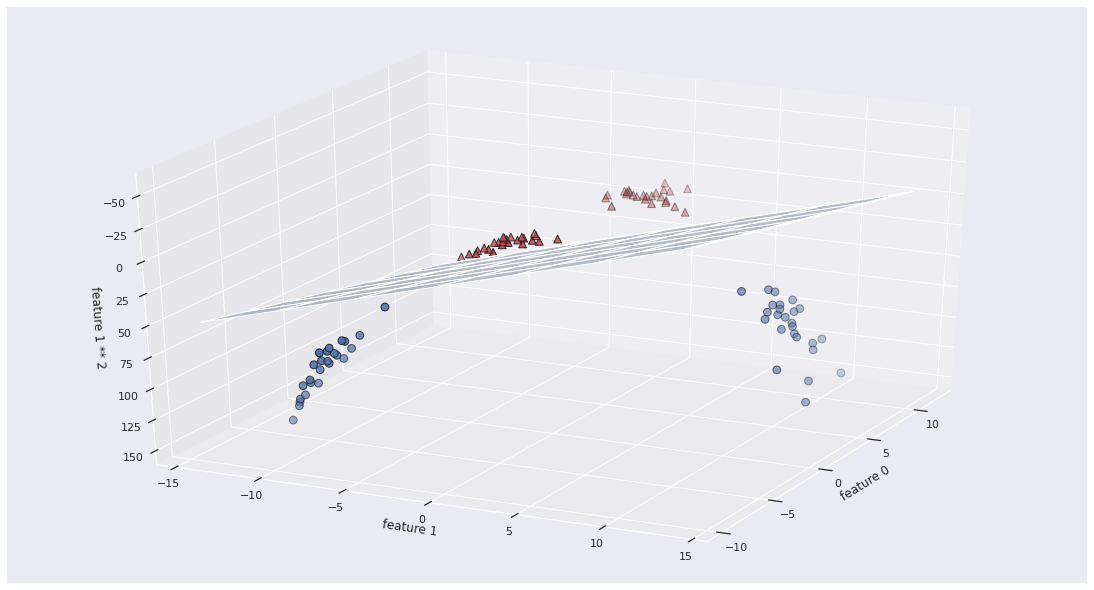

In [7]:
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
if matplotlib.__version__ >= '3.4':
  # Axes3D가 자동으로 그림에 추가되는 방식은 matplotlib 3.4 버전에서 deprecate 되었다.
  # 이와 관련된 경고를 피하려면 auto_add_to_figure=False로 지정하고 
  # figure.add_axes(ax)로 직접 추가해야 한다.
  ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
  figure.add_axes(ax)
else:
  ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 1 ** 2")

원래 특성으로 투영해보면 이 선형 SVM 모델은 더 이상 선형이 아니다. 직선보다 타원에 가까운 모습을 확인할 수 있다.

Text(0, 0.5, 'feature 1')

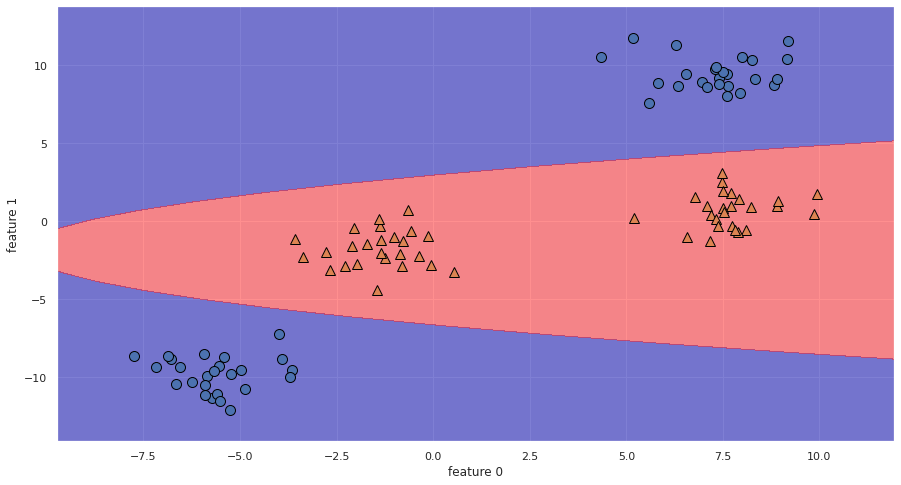

In [8]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

## 커널 기법

앞서 비선형 특성을 추가하여 선셩 모델을 강력하게 만들었다. 하지만 많은 경우 어떤 특성을 추가해야 할지 모르고 특성을 많이 추가하면 연산 비용이 커진다. 하지만 수학적 기교를 이용하면 특성을 많이 만들지 않고도 고차원에서 분류기를 학습시킬 수 있다. 이를 **"커널 기법"**이라고 한다.

고차원 공간에 매핑하는 데 많이 사용하는 방법은 두 가지이다.
1. 특성의 가능한 조합을 지정된 차수까지 모두 계산하는 다항식 커널
2. 가우시안 커널로 불리우는 RBF 커널(모든 차수를 모든 다항식에 고려한다)

## SVM 이해하기
학습이 진행되는 동안 SVM은 각 훈련 데이터 포이트가 두 클래스 사이의 결정 경계를 구분하는 데 얼마나 중요한지를 배우게 된다. 일반적으로 훈련 데이터의 일부만 결정 경계를 만드는 데 영향을 준다. 바로 클래스 사이의 경계에 위치한 데이터 포인트들. 이런 데이터 포인트를 **서포트 벡터**라 하며, 여기서 서포트 벡터 머신이란 이름이 유래했다.

새로운 데이터 포인들에 대해 예측하려면 각 서포트 벡터와의 거리를 측정한다. 분류 결정은 서포트 벡터까지의 거리에 기반하며 서포드 벡터의 주용도는 훈련 과정에서 학습한다. 

\
다음은 두 개의 클래스를 가진 2차원 데이터셋에 서포트 벡터 머신을 학습시킨 결과를 보여준다. 결정 경계는 검은 실선으로, 서포드 벡터는 굵은 테두리로 크게 그렸다.

Text(0, 0.5, 'feature 1')

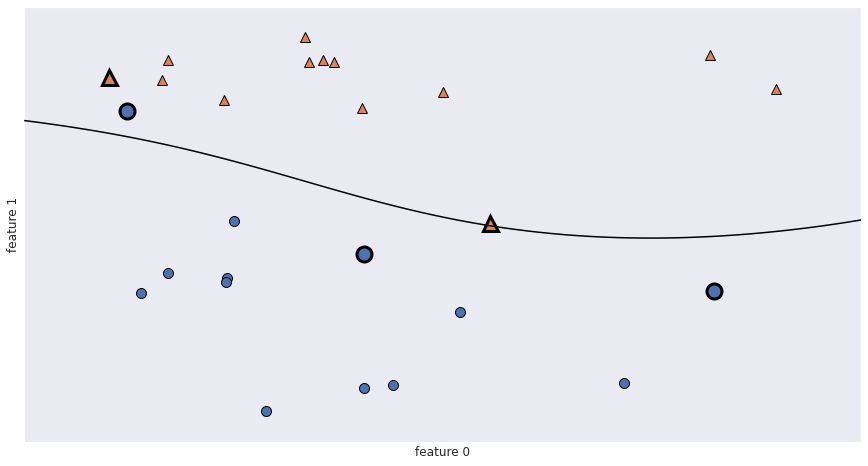

In [9]:
# forge 데이터셋에 SVM을 학습시켜 이 그래프를 그리는 코드다

from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블이 결정된다.
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

사용한 두 매개변수 C와 gamma 에 대해 자세히 살펴보자.

gamma 매개변수는 앞 절의 공식에 나와 있는 r로 가우시안 커널 폭의 역수에 해당한다. gamma 매개변수가 하나의 훈련 샘플이 미치는 영향의 범위를 결정한다.
작은값은 넓은 영역을 뜻하며 근 값이라면 영향이 피치는 범위가 제한적이다.
즉, 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커진다.

\
이제 매개변수를 다르게 했을 때 어떻게 변경되는지 살펴보자.

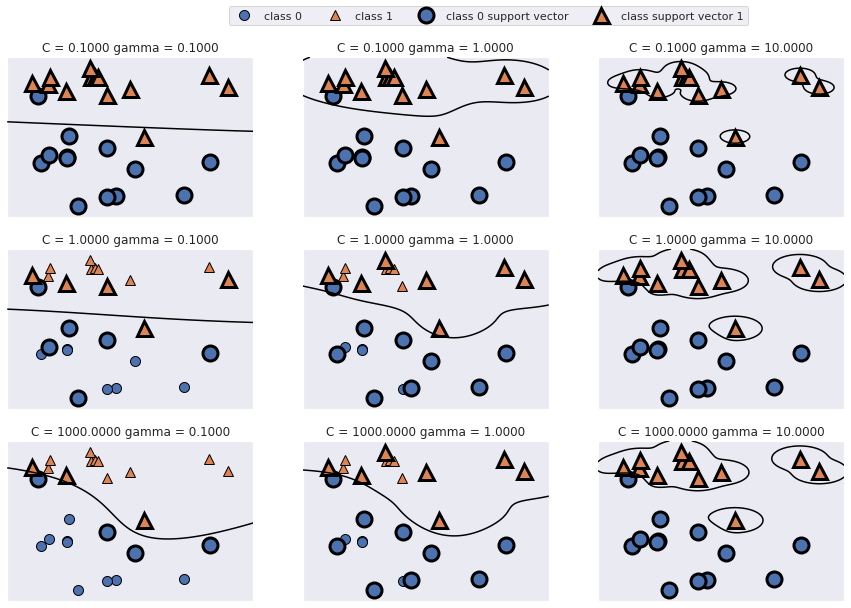

In [10]:
from IPython.core.pylabtools import figsize
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0 , 3]):
  for a, gamma in zip(ax, range(-1, 2)):
    mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["class 0", "class 1", "class 0 support vector", "class support vector 1"], ncol=4, loc=(.9, 1.2))

왼쪽에서 오른쪽 gamma 증가, 포인트에 해당하는 결정경계가 민감해짐
위에서 아래 C 증가, 클수록 제약이 큰 모델을 만들고 각 데이터 포인트의 영향력이 작다.

\
RBF 커널 SVM 유방암 데이터셋에 적용해보자. 기본값 C=1, gamma=1/n_features 사용

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.904
테스트 세트 정확도: 0.937


낮다. 과소적합되었다. svm은 잘 작동하는 편이지만 매개변수 설정과 데이터 스케일에 매우 민감하다. 특히 입력 특성의 범위가 비슷해야 한다. 각 특성의 최솟값과 최댓값을 로그 스케일로 나타내보자

Text(0, 0.5, 'feature scale')

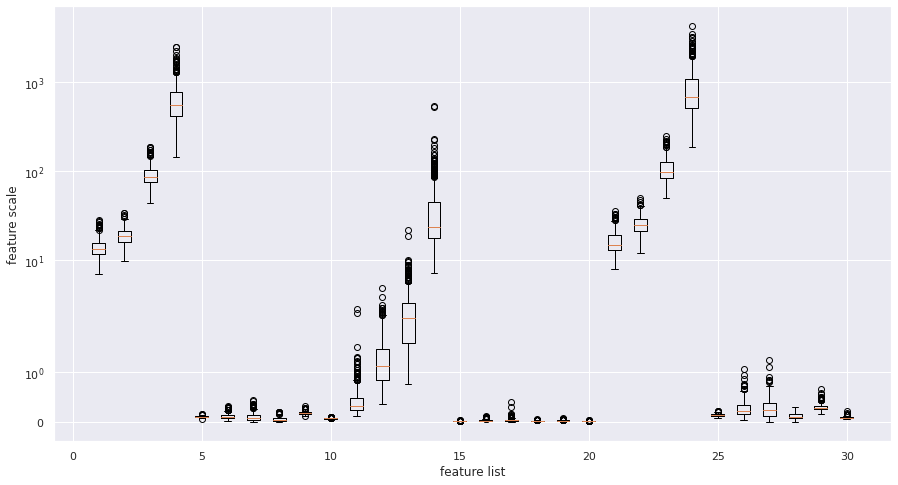

In [12]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale('symlog')
plt.xlabel('feature list')
plt.ylabel('feature scale')

특성의 양이 너무 많다. 커널 SVM에서 이부분은 큰 영향을 준다.

이 문제를 해결하는 방법 중 하난는, 특성 값의 범위가 비슷해지도록 조정하는 것.
모든 특성의 값을 평균이 0이고 단위 분산이 되도록 하거나 0과 1사이로 맞추는 방법 사용하거나 전처리 메서드를 이용하는 방법도 있다.

일단 직접 변환시켜본다.

In [14]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1이다.
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis=0))
print("특성별 최댓값\n", X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [16]:
# 테스트 세트에도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용한다.
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.984
테스트 세트 정확도: 0.972


데이터의 스케일을 조정하니 결과가 달라졌다.
훈련과 테스트 세트의 정확도가 모두 상승했고 과소적합이 많이 해소되었다.
여기서 C나 gamma 값을 증가시켜 좀 더 복잡한 모델을 만들 수 있다.

In [17]:
svc = SVC(C=20)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.979


C 값을 증가시켰더니 모델의 성능이 더 높게 향상되었다.

### 결론
커널 서포트백터 머신은 다양한 데이터셋에서 잘 작동한다. SVM은 데이터의 특성이 몇 개 안 되더라도 복잡한 결정 경계를 만들 수 있다. 저차원과 고차원의 데이터(즉 특성이 적을 때와 많을 때)에 모두 잘 작동하지만 샘플이 많을 경우 잘 맞지 않는다. 또한 데이터 전처리와 매개변수 설정에 신경을 많이 써야한다.

그래서 요즘엔 대부분 램덤과 그레이디언트 같은 (전처리가 거의 또는 전혀 필요 없는) 트리 기반 모델을 애플리케이션에 많이 사용한다. 더군다나 SVM모델은 분석하기도 어렵다. 비전문가에게 모델을 설명하기가 난해하다.